In [1]:
%load_ext autoreload
%autoreload 2

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from utils.plot import *
from utils.preprocessing import *

In [35]:
n = 320

# 1D Triangle Function

In [36]:
def tri_1D(n):
    x = np.linspace(0, 1, n)
    return (2/np.pi) * np.arcsin(np.sin(np.pi * x))

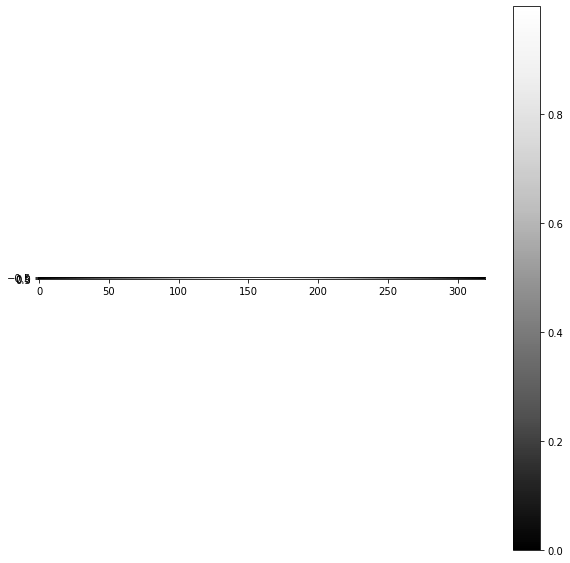

In [37]:
plt.imshow(tri_1D(n)[np.newaxis, ...])
plt.colorbar()
plt.show()

# 2D Triangle Function

In [38]:
def tri_2D(n):
    x = np.linspace(0, 1, n)
    y = np.linspace(0, 1, n)
    xx, yy = np.meshgrid(x, y, sparse=False)
    
    tri_x = (2/np.pi) * np.arcsin(np.sin(np.pi * xx))
    tri_y = (2/np.pi) * np.arcsin(np.sin(np.pi * yy))
    return tri_x * tri_y

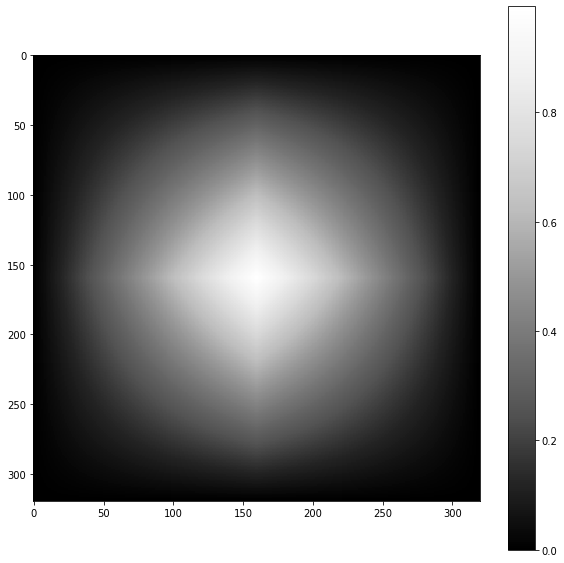

In [39]:
plt.imshow(tri_2D(n))
plt.colorbar()
plt.show()

# 3D Triangle Function

In [40]:
def tri_3D(n):
    x = np.linspace(0, 1, n)
    y = np.linspace(0, 1, n)
    z = np.linspace(0, 1, n)
    xx, yy, zz = np.meshgrid(x, y, z, sparse=False)
    
    tri_x = (2/np.pi) * np.arcsin(np.sin(np.pi * xx))
    tri_y = (2/np.pi) * np.arcsin(np.sin(np.pi * yy))
    tri_z = (2/np.pi) * np.arcsin(np.sin(np.pi * zz))
    return tri_x * tri_y * tri_z

In [41]:
tri_3d_img = tri_3D(n)

In [42]:
tri_3d_img.shape

(320, 320, 320)

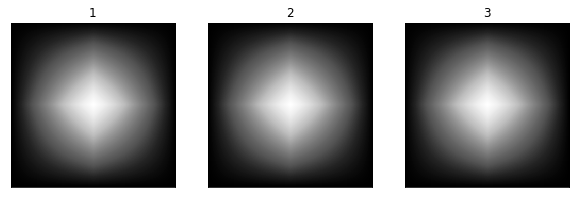

In [43]:
center_vol_plot(tri_3d_img)

# Stacking 2D Triangles...

In [44]:
tri_2d_img = tri_2D(n)

In [45]:
tri_2d_img.shape

(320, 320)

In [110]:
from scipy.ndimage import rotate

In [142]:
# rotate smoothly to 90degrees
n_slices = 225
angles = np.linspace(0, 180, n_slices)

In [143]:
tri_3d_img = np.stack(
    [rotate(tri_2d_img, angle, reshape=False, mode='nearest') for angle in angles]
).transpose(1,2,0)

In [144]:
tri_3d_img.shape

(320, 320, 225)

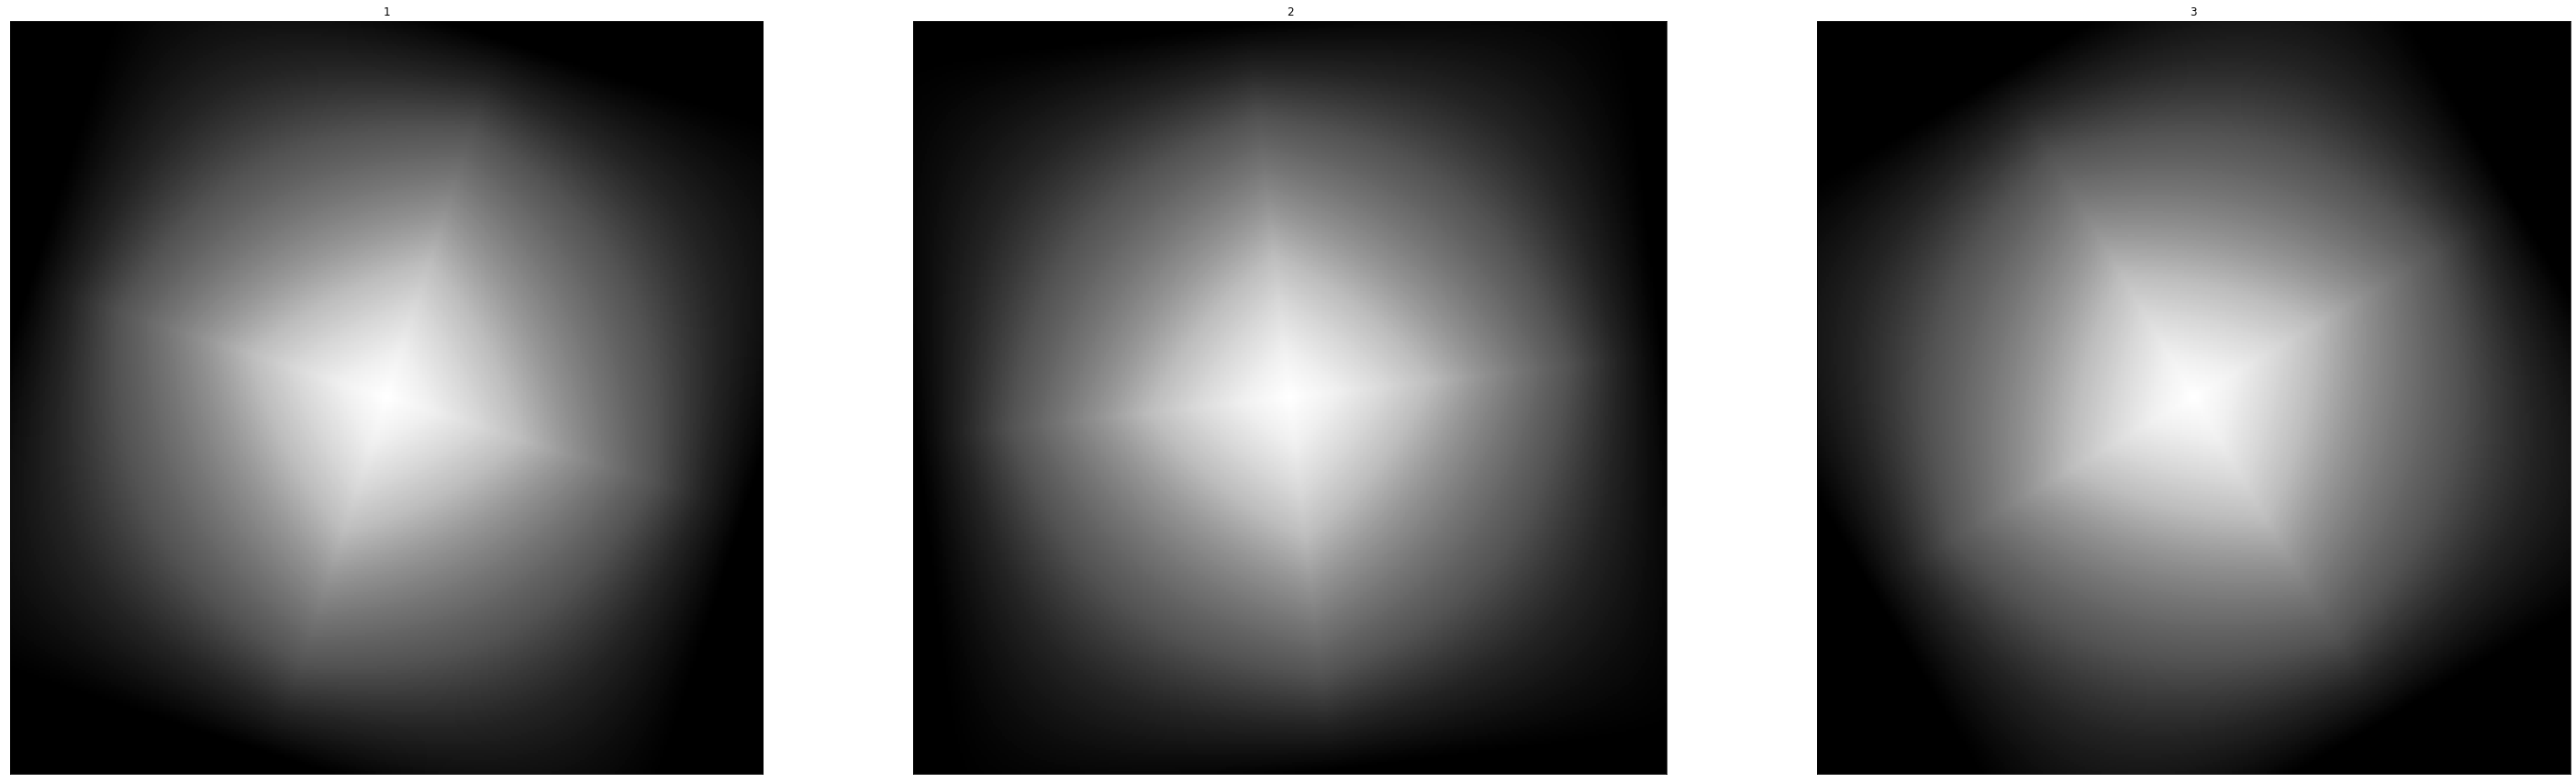

In [145]:
multiplot(
    [tri_3d_img[...,90], tri_3d_img[...,120], tri_3d_img[...,150]],
    [1,2,3],
)

In [146]:
resolution = (0.8, 0.8, 5.0)
k = max(resolution) / min(resolution)
blur_k = fwhm_needed(min(resolution), max(resolution))

In [147]:
img = tri_3d_img
blur_img = blur(img, blur_k, axis=2)
alias_img = alias(blur_img, k, axis=2)

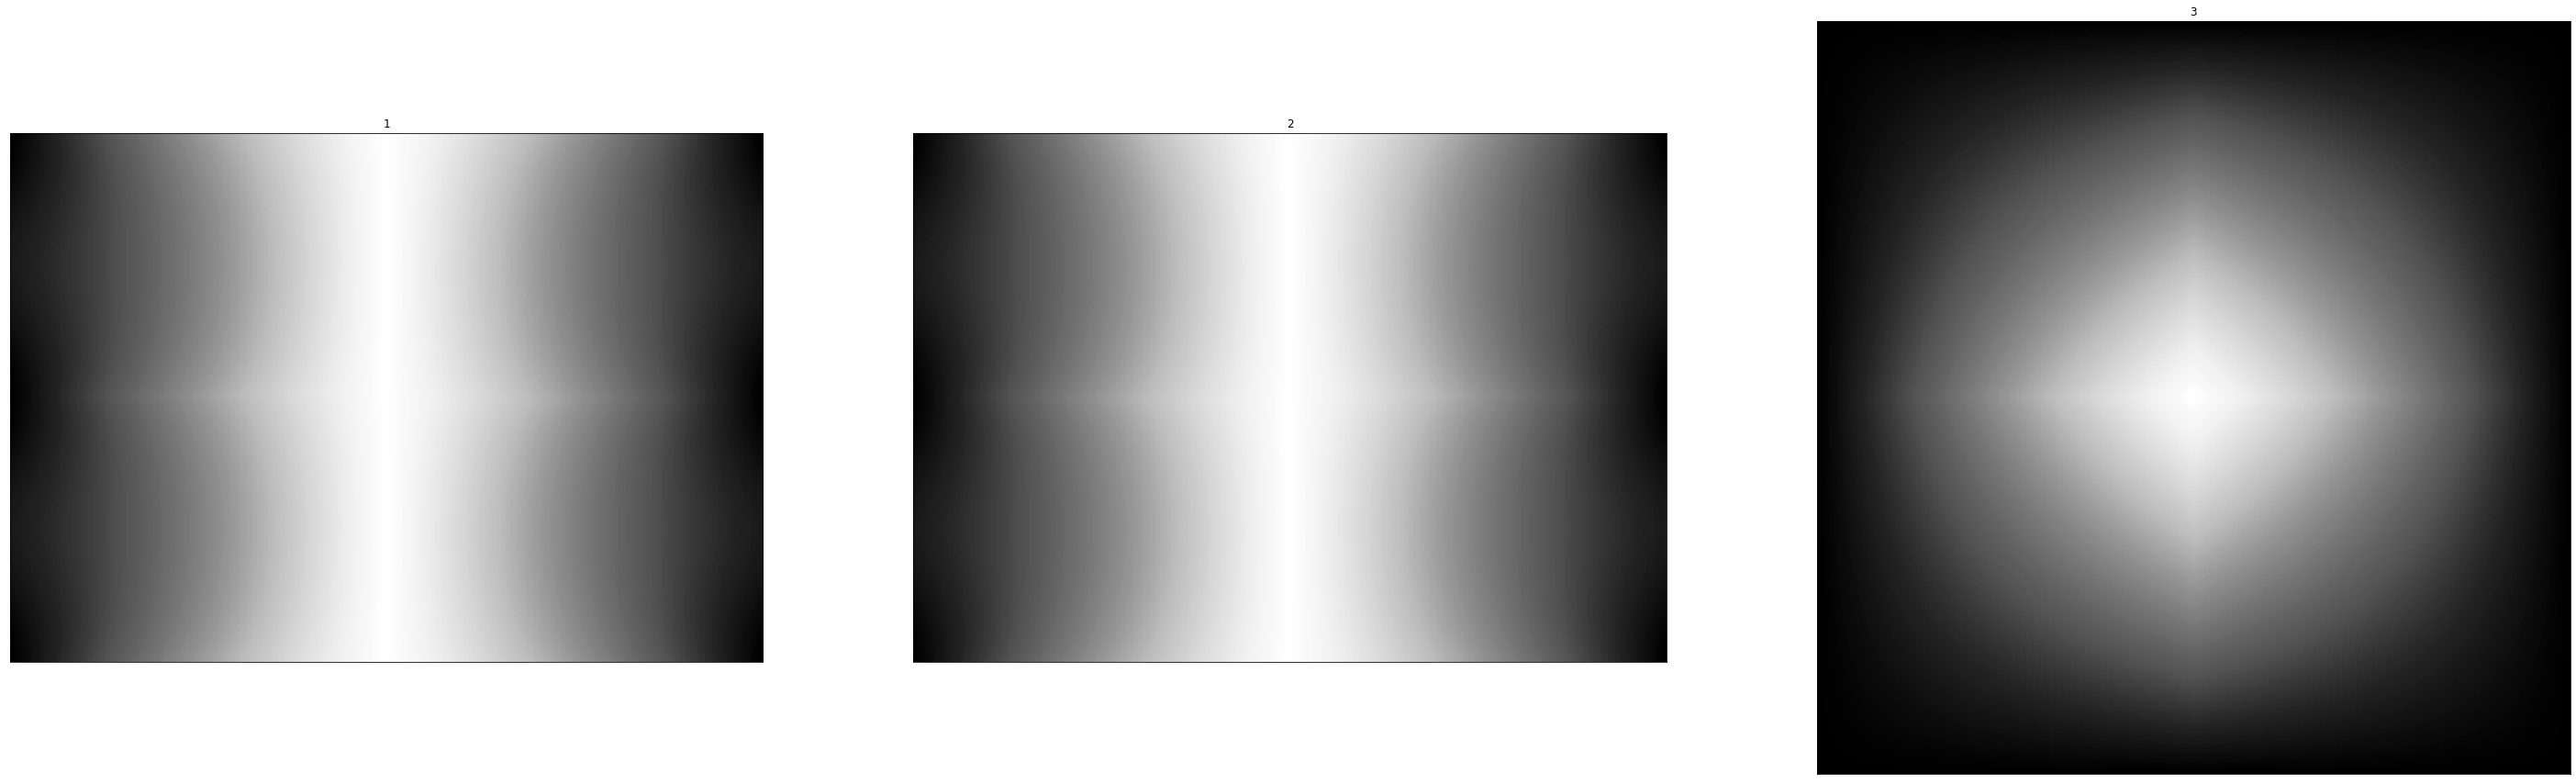

In [148]:
center_vol_plot(img)

In [149]:
sample_z = np.linspace(0, img.shape[2]-1, 36).astype(np.int32)

In [150]:
sample_z

array([  0,   6,  12,  19,  25,  32,  38,  44,  51,  57,  64,  70,  76,
        83,  89,  96, 102, 108, 115, 121, 128, 134, 140, 147, 153, 160,
       166, 172, 179, 185, 192, 198, 204, 211, 217, 224], dtype=int32)

In [151]:
lr_img = np.zeros((n, n, 36))

In [152]:
lr_img.shape

(320, 320, 36)

In [153]:
for i in range(36):
    lr_img[:,:,i] = alias_img[:,:,sample_z[i]]

In [154]:
plt.rcParams['figure.figsize'] = (50, 50)

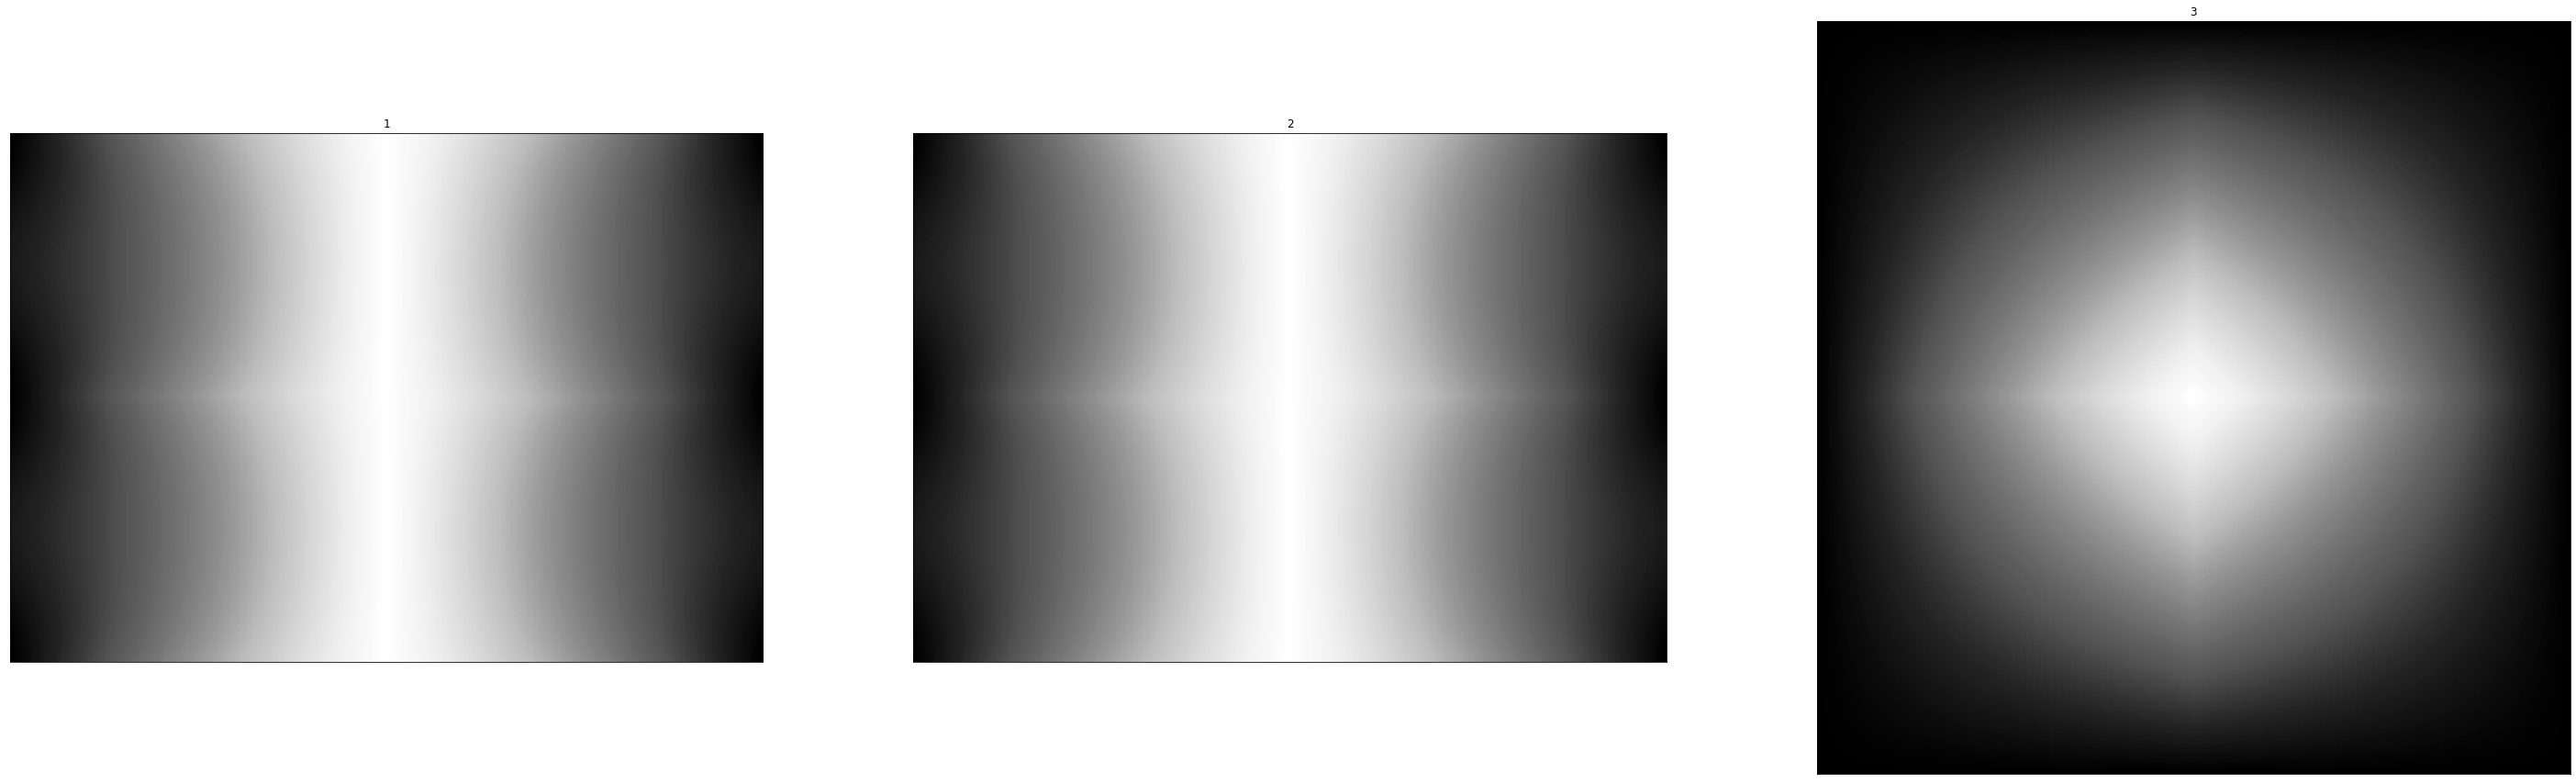

In [155]:
center_vol_plot(img)

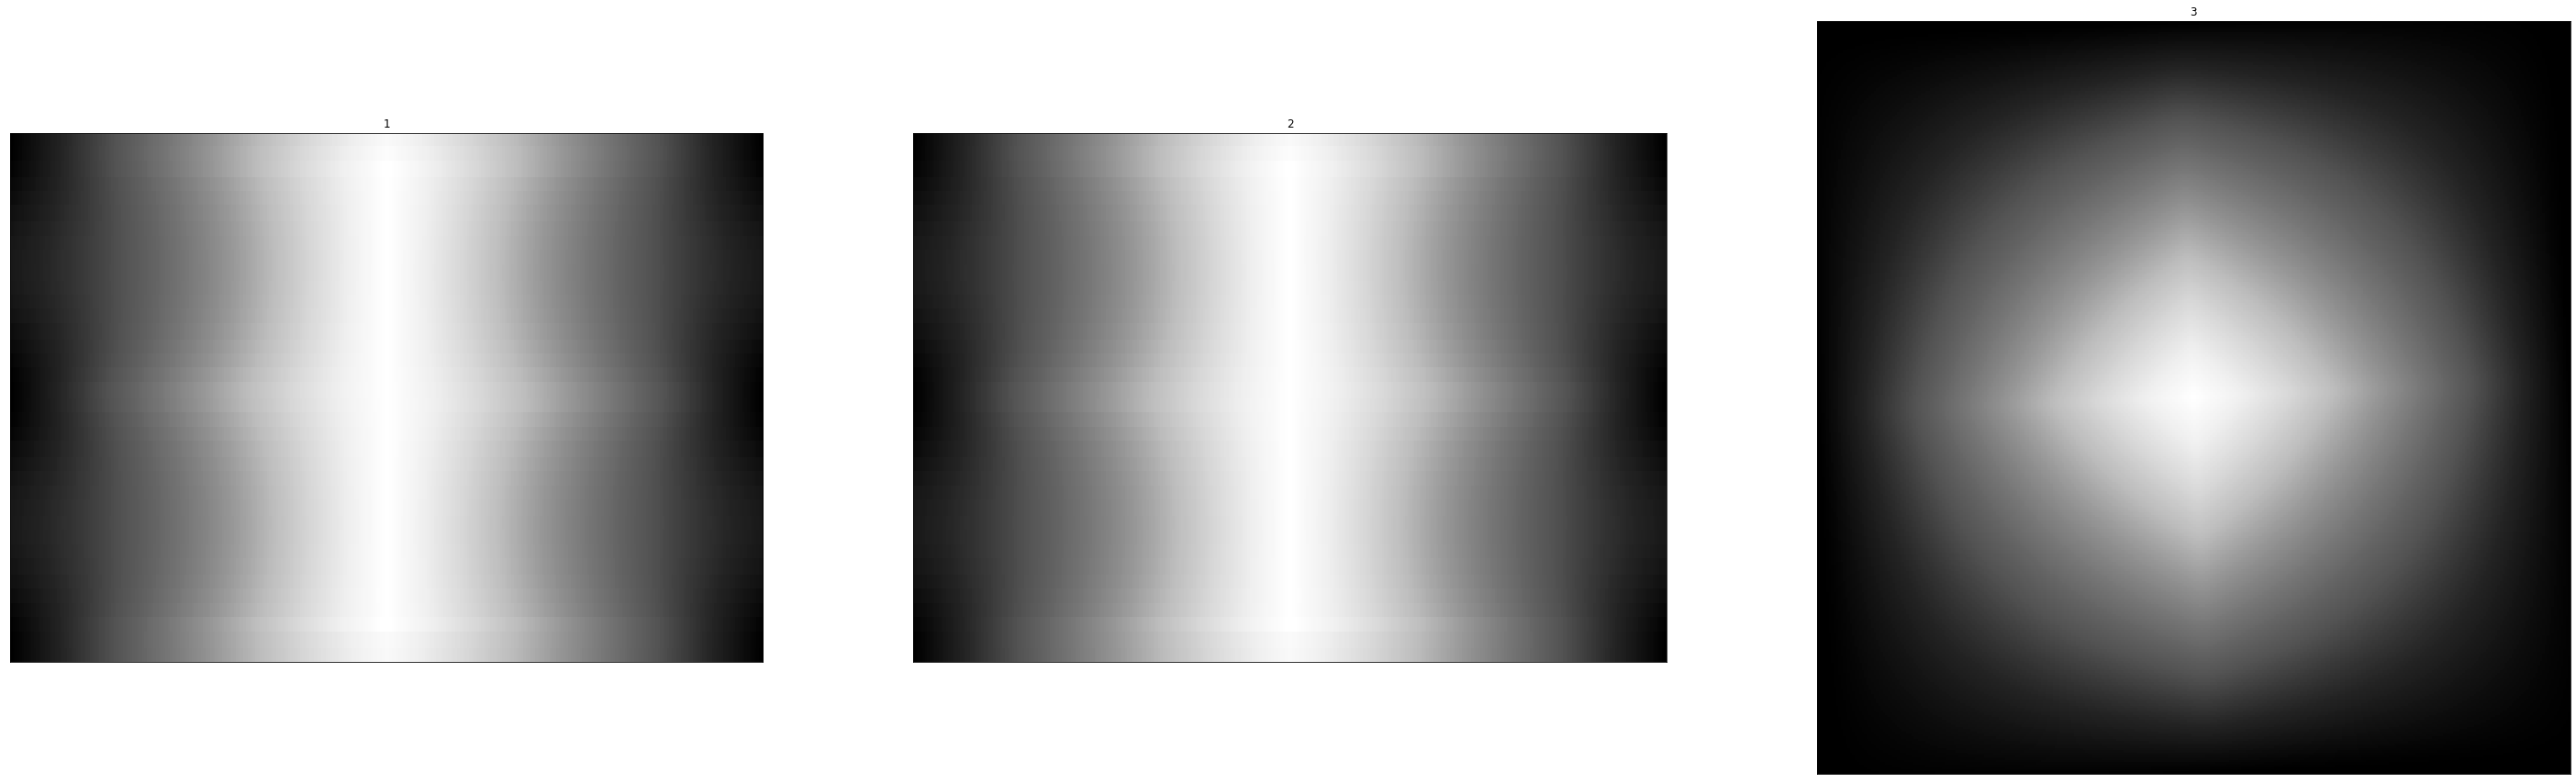

In [156]:
center_vol_plot(lr_img, img.shape)